In [9]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [10]:
df = pd.read_csv('df2.csv')
df

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,fico_range_low,fico_range_high,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,is_delinquent
0,218963,8800.0,8800.0,8800.00,15.61,307.70,30000.0,680.0,684.0,3677.140000,3677.14,2492.02,1185.12,574.0,570.0,1
1,1086540,17300.0,17300.0,17300.00,21.48,472.71,28080.0,675.0,679.0,15449.750000,15449.75,7248.86,8200.89,499.0,0.0,1
2,1105313,16800.0,16800.0,16800.00,19.48,440.26,80000.0,695.0,699.0,1815.580000,1815.58,686.65,1128.93,619.0,615.0,1
3,1053847,16000.0,16000.0,16000.00,5.32,481.84,85000.0,750.0,754.0,7653.180000,7653.18,5486.21,776.97,549.0,545.0,1
4,175573,10000.0,10000.0,9875.00,12.29,333.53,35035.0,680.0,684.0,5374.810000,5307.62,3987.91,1386.90,569.0,565.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,55427,4000.0,4000.0,4000.00,7.89,125.15,58500.0,750.0,754.0,4243.910000,4243.91,4000.00,243.91,759.0,755.0,0
299996,1947411,10000.0,10000.0,10000.00,13.99,341.73,75000.0,660.0,664.0,10487.871040,10487.87,10000.00,487.87,689.0,685.0,0
299997,1634396,6000.0,6000.0,5991.13,6.17,183.00,54000.0,740.0,744.0,6359.485695,6348.82,6000.00,359.49,779.0,775.0,0
299998,248234,10000.0,10000.0,10000.00,8.18,314.20,32000.0,685.0,689.0,11302.105623,11302.11,10000.00,1302.11,699.0,695.0,0


In [11]:
df.drop(columns= 'Unnamed: 0', inplace=True)

In [12]:
df1 = df
df1

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,fico_range_low,fico_range_high,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,is_delinquent
0,8800.0,8800.0,8800.00,15.61,307.70,30000.0,680.0,684.0,3677.140000,3677.14,2492.02,1185.12,574.0,570.0,1
1,17300.0,17300.0,17300.00,21.48,472.71,28080.0,675.0,679.0,15449.750000,15449.75,7248.86,8200.89,499.0,0.0,1
2,16800.0,16800.0,16800.00,19.48,440.26,80000.0,695.0,699.0,1815.580000,1815.58,686.65,1128.93,619.0,615.0,1
3,16000.0,16000.0,16000.00,5.32,481.84,85000.0,750.0,754.0,7653.180000,7653.18,5486.21,776.97,549.0,545.0,1
4,10000.0,10000.0,9875.00,12.29,333.53,35035.0,680.0,684.0,5374.810000,5307.62,3987.91,1386.90,569.0,565.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,4000.0,4000.0,4000.00,7.89,125.15,58500.0,750.0,754.0,4243.910000,4243.91,4000.00,243.91,759.0,755.0,0
299996,10000.0,10000.0,10000.00,13.99,341.73,75000.0,660.0,664.0,10487.871040,10487.87,10000.00,487.87,689.0,685.0,0
299997,6000.0,6000.0,5991.13,6.17,183.00,54000.0,740.0,744.0,6359.485695,6348.82,6000.00,359.49,779.0,775.0,0
299998,10000.0,10000.0,10000.00,8.18,314.20,32000.0,685.0,689.0,11302.105623,11302.11,10000.00,1302.11,699.0,695.0,0


In [13]:
y = df1['is_delinquent']
X = df1.drop("is_delinquent", axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                                    test_size = 0.25, random_state=27)

In [15]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
tree_clf.feature_importances_

array([9.82749096e-03, 1.26337251e-01, 2.72363815e-02, 0.00000000e+00,
       3.73728072e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.01876782e-01, 0.00000000e+00,
       0.00000000e+00, 6.34348366e-01])

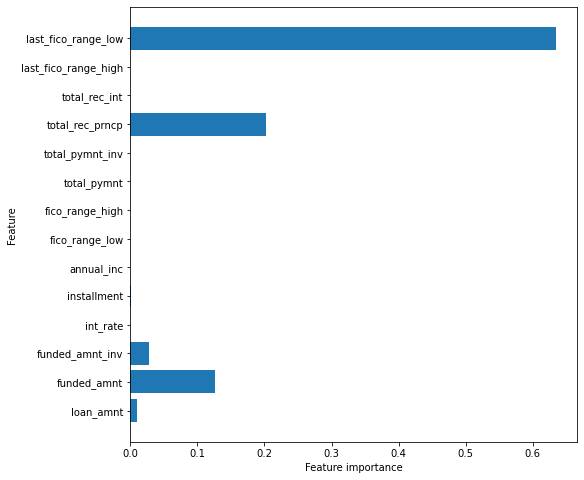

In [17]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [18]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [19]:
forest.score(X_train, y_train)


0.9702177777777777

In [20]:
forest.score(X_test, y_test)

0.9709333333333333

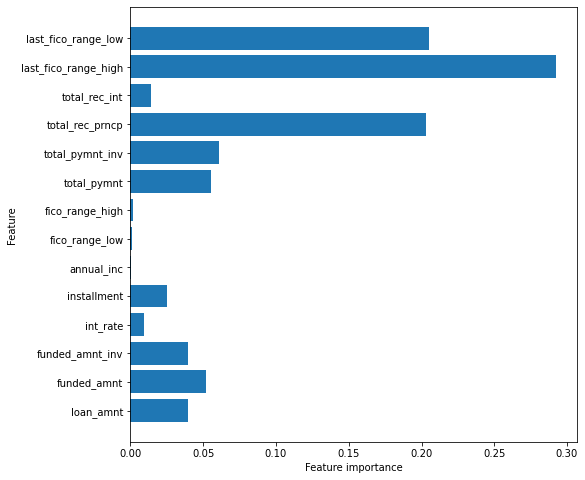

In [21]:
plot_feature_importances(forest)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     49920
           1       0.96      0.95      0.96     25080

    accuracy                           0.97     75000
   macro avg       0.97      0.97      0.97     75000
weighted avg       0.97      0.97      0.97     75000



In [23]:
y_pred = forest.predict(X_test)
